In [1]:
import pandas as pd 
import plotly.express as px
import seaborn as sns  
from sklearn import datasets
from sklearn.decomposition import PCA     # Principal Component Analysis

## Need For PCA
    - To reduce the dimensionality of data sample(High dimension data is more complex to process due to 
    - inconsistancy in features which increase the computation time and make data processing more 
    -  convoluted)
    - To find highly correlated features in dataset
    - Remove redundent da

In [3]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [4]:
df['category'] = wine.target
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  category  
0                            3.92   1065.0         0  
1                            3.40   1050.0         0  
2                            3.17   1185.0         0  
3                            3.45   1480.0         0  
4                            2.93    735.0         0  
..                            ...      ...       ...  
173                          1.74    740.0         2  
174                          1.56    750.0         2  
175                          1.56    835.0         2  
176                          1.62    840.0         2  
177                          1.60    560.0         2  

[178 rows x 14 columns]

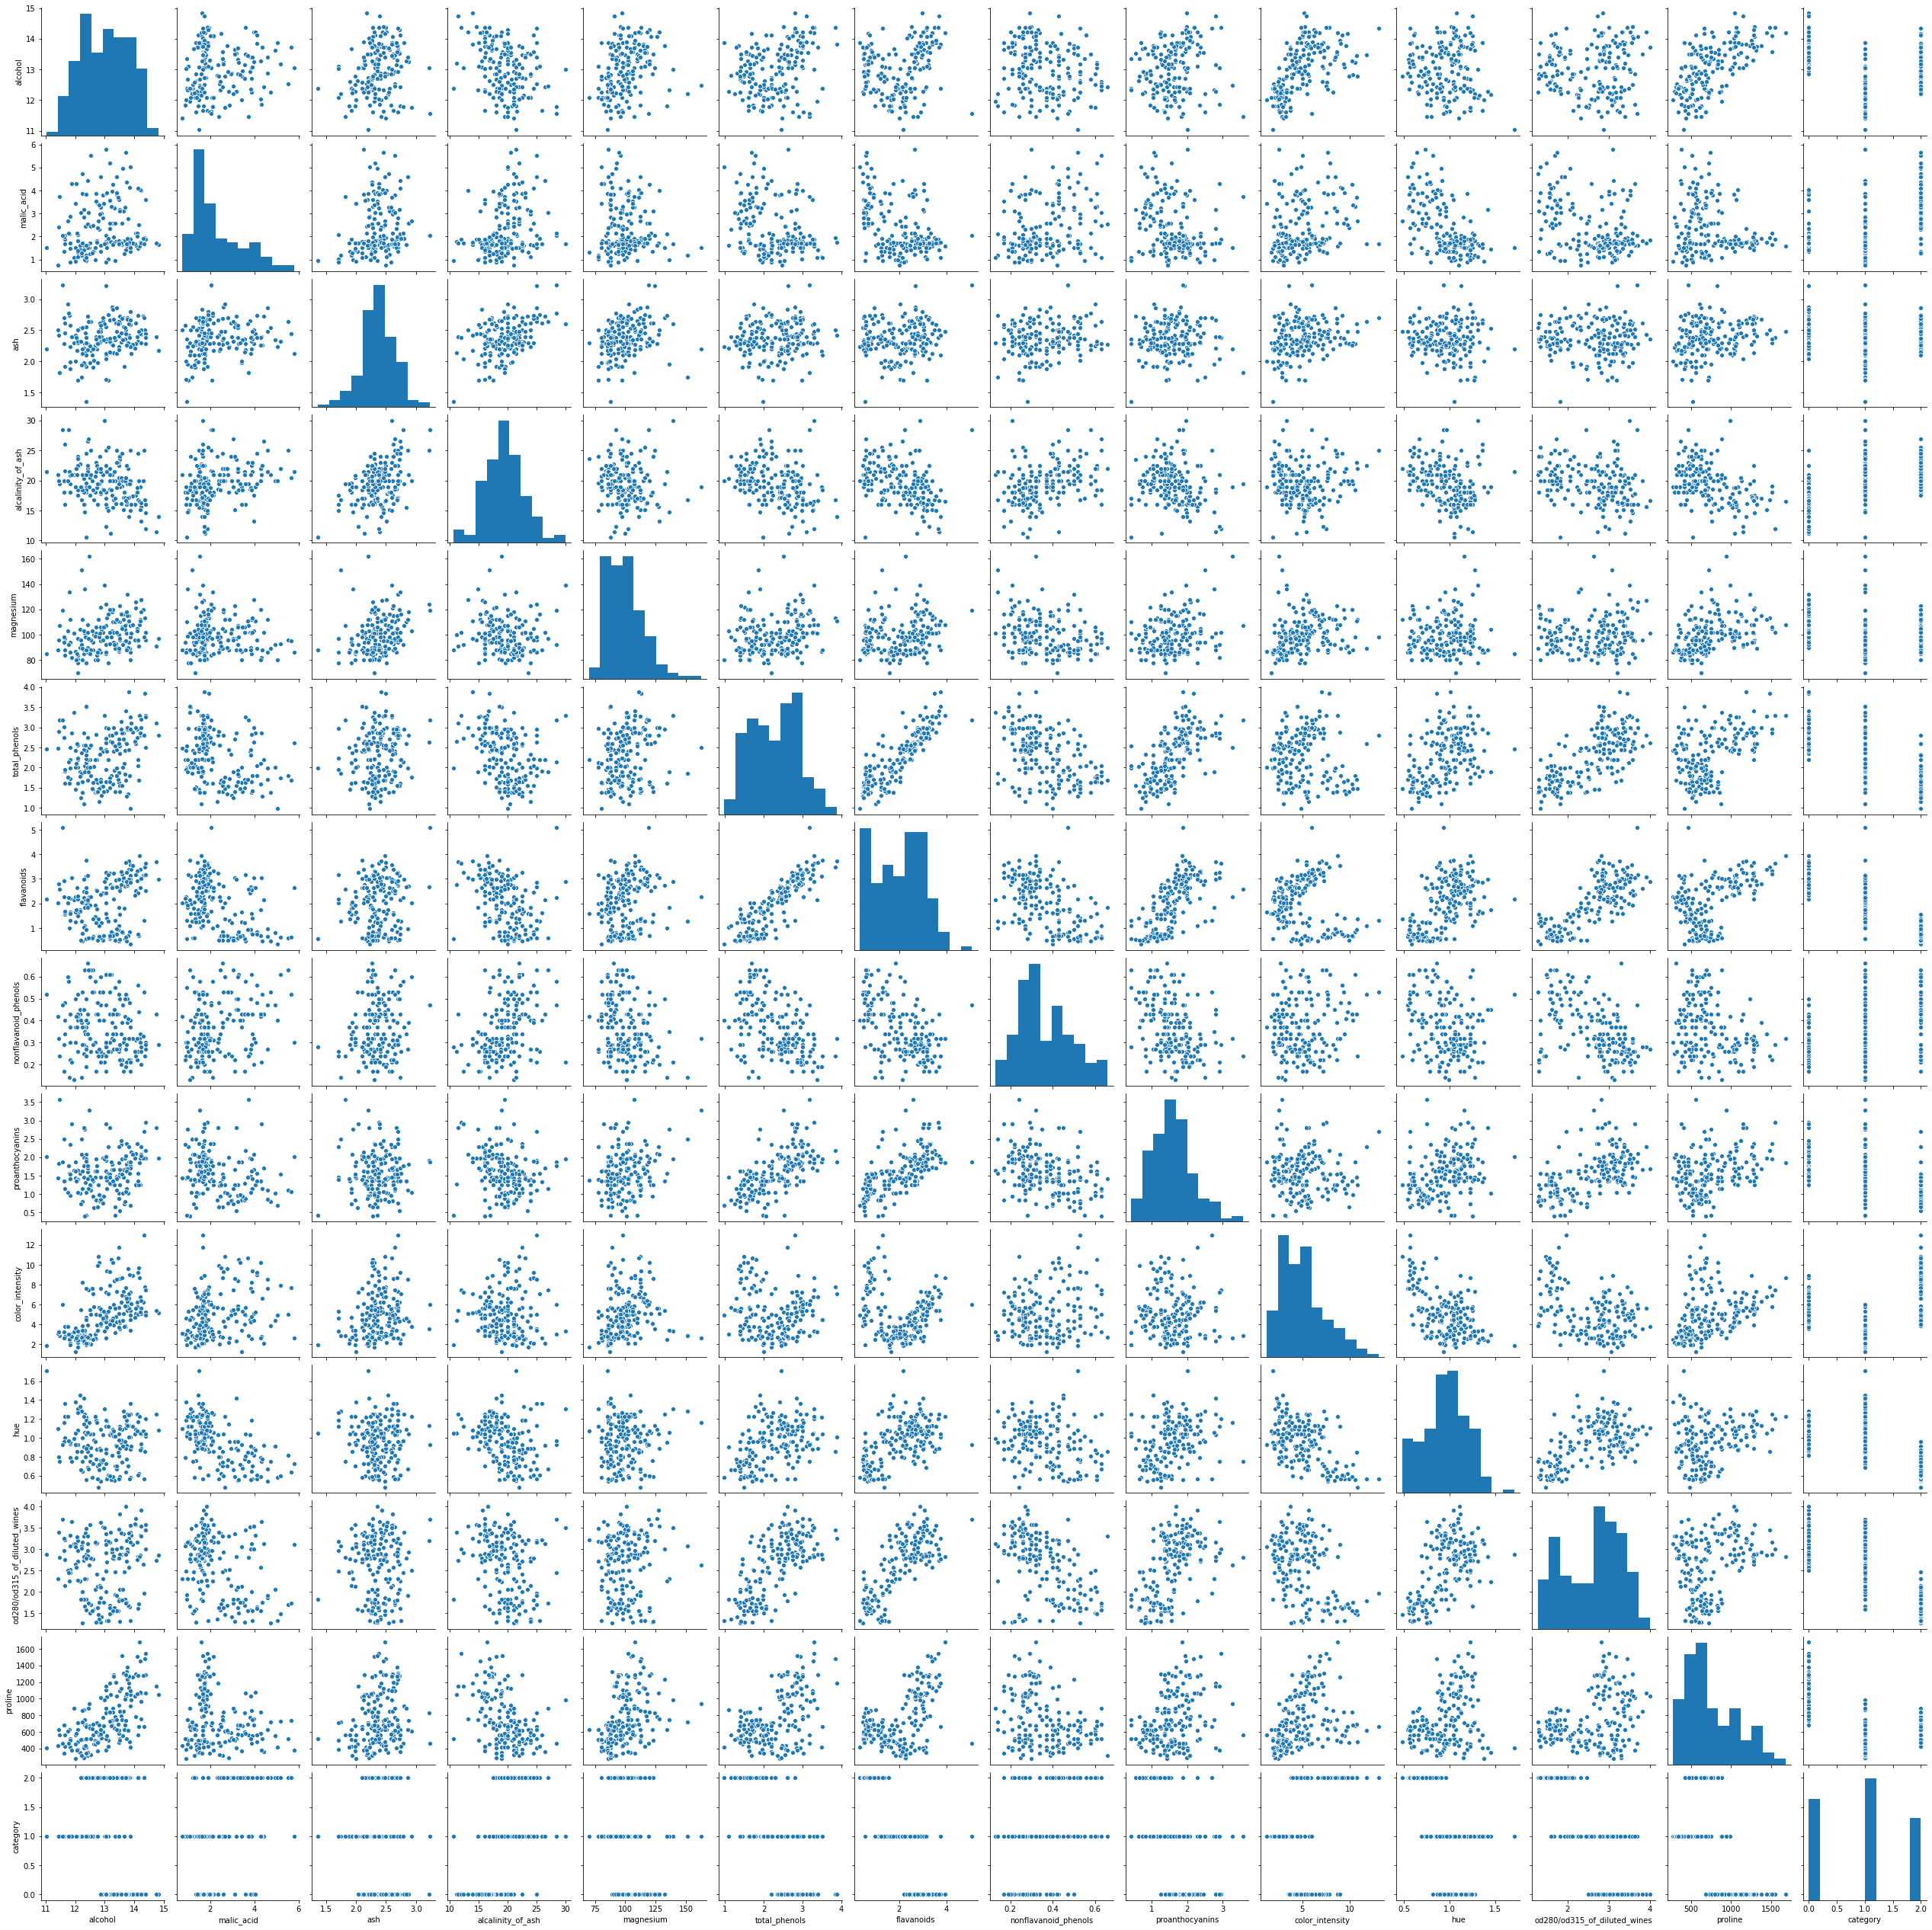

In [5]:
sns.pairplot(df)

In [20]:
x = wine.data
y = wine.target

In [24]:
tx, test_x, ty, test_y = train_test_split(x,y,test_size=.2,random_state=0)

In [25]:
clf1 = DecisionTreeClassifier(random_state=1)
clf1.fit(tx,ty)

DecisionTreeClassifier(random_state=1)

In [26]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(test_y, clf1.predict(test_x)) * 100

97.22222222222221

## improving performance

In [6]:
pca = PCA(n_components=4)

In [7]:
x = wine.data
y = wine.target

In [8]:
px = pca.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy,testy = train_test_split(px,y,test_size=.2 ,random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(trainx,trainy)

DecisionTreeClassifier(random_state=1)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(testy, clf.predict(testx)) * 100

94.44444444444444

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
confusion_matrix(testy,clf.predict(testx))

array([[13,  1,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [19]:
print(classification_report(testy,clf.predict(testx)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00         6

    accuracy                           0.94        36
   macro avg       0.96      0.96      0.96        36
weighted avg       0.94      0.94      0.94        36

